In [ ]:
## Without Feature Selection of Heart Failure

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wns
wns.filterwarnings('ignore')
HrtFailure_Prd = pd.read_csv('/HeartFailure2Processed.csv')
HrtFailure_Prd

,Unnamed: 0,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,0,1,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,1,1,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,2,1,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,3,4,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,4,1,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175724,175724,4,205,254,0.167375,0.998450,-1.884460,-2.278752,-1.884460,3,...,-0.063313,31,8,44,5,-0.063313,0.026827,0.679694,1.798788,1.291884
175725,175725,1,254,231,0.067664,0.986674,-0.321804,-0.321804,-0.743924,2,...,-0.038867,5,3,24,16,-0.038867,-0.370870,-0.697097,-0.948059,-1.078708
175726,175726,1,231,229,-0.129754,0.746366,-0.303551,-0.303551,-0.875649,3,...,-0.113876,4,4,24,16,-0.113876,-0.113876,-0.452218,-0.738737,-0.917931
175727,175727,1,229,232,-0.133953,0.747789,-0.626746,-0.626746,-0.871080,2,...,0.087784,18,8,42,16,0.087784,0.107684,0.308452,0.572327,-0.093598


In [3]:
del HrtFailure_Prd['Unnamed: 0']

## 0 (Fusion beat), 1 (Normal), 2 (Unknown beat), 3 (Supraventricular ectopic beat), 4 (Ventricular ectopic beat)
HrtFailure_Prd['type'].value_counts()

,count
type,
1,153546
4,20000
3,1958
0,219
2,6


In [4]:
Hrtflr_Xi = HrtFailure_Prd.drop('type', axis = 1)
Hrtflr_Yo = HrtFailure_Prd['type']
from collections import Counter as Ctr
from imblearn.over_sampling import SMOTE as SM

print('Processed Result of Heart Failure = %s' % Ctr(Hrtflr_Yo))
hrtflrmod = SM()
Hrtflr_Xi, Hrtflr_Yo = hrtflrmod.fit_resample(Hrtflr_Xi, Hrtflr_Yo)
print('Balanced Result of Heart Failure  = %s' % Ctr(Hrtflr_Yo))



Processed Result of Heart Failure = Counter({1: 153546, 4: 20000, 3: 1958, 0: 219, 2: 6})
Balanced Result of Heart Failure  = Counter({1: 153546, 4: 153546, 3: 153546, 0: 153546, 2: 153546})


In [5]:
Hrtflr_Xi

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,2,27,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,5,14,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,25,35,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,3,14,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,34,43,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767725,116,152,0.291223,0.605348,0.721000,0.425167,0.238649,18,4,26,...,-0.142571,13,4,20,2,-0.142571,-0.108739,0.030071,0.118982,0.167826
767726,119,263,0.350533,0.992147,2.428658,-2.418780,-0.314033,48,22,131,...,-1.290849,5,12,33,16,-1.290849,-1.440191,-1.577985,-1.699048,-1.791360
767727,118,324,0.360020,0.898867,2.294052,-2.183042,-0.348597,43,23,129,...,-1.073926,6,11,33,15,-1.073926,-1.220330,-1.350735,-1.463299,-1.552861
767728,106,221,0.181745,-0.128093,0.603076,-0.699094,-0.158955,33,18,65,...,0.006002,37,3,52,12,0.006002,0.122809,0.997978,0.430931,-0.149407


In [6]:
from sklearn.model_selection import train_test_split as Splt
from sklearn.model_selection import GridSearchCV as GdSH
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import time as tm
from sklearn.metrics import confusion_matrix as mtrx
from sklearn.metrics import ConfusionMatrixDisplay as dp
from sklearn.metrics import classification_report as rpt

hrtflrXtn, hrtflrXtst, hrtflrYtn, hrtflrYtst = Splt(Hrtflr_Xi, Hrtflr_Yo,test_size=0.4,random_state=12)
hrtflrXvl, hrtflrXtst, hrtflrYvl, hrtflrYtst = Splt(hrtflrXtst, hrtflrYtst, test_size=0.5, random_state=12)

print("Train Heart Failure Data   :", hrtflrXtn.shape) ##^^ 60% of training
print("Test Heart Failure Data    :", hrtflrXtst.shape) ##^^ 20% of testing
print("Validate Heart Failure Data:", hrtflrXvl.shape) ##^^ 20% of validation


Train Heart Failure Data   : (460638, 32)
Test Heart Failure Data    : (153546, 32)
Validate Heart Failure Data: (153546, 32)


Performance of Logistic Regression Classifier

In [8]:
from sklearn.linear_model import LogisticRegression as Lr

hrtflrprms = {
  'penalty': ['l2', 'l1', None],
   'solver': ['lbfgs','saga', 'sag'],
  'max_iter': [50, 100, 150, 200],
   'tol': [0.1, 0.001, 1e-3, 1e-2]
}

Hrtflrmdl = Lr(random_state=12)
Hrtflrmdl = GdSH(Hrtflrmdl, hrtflrprms, cv=2)
Hrtflrmdl.fit(hrtflrXtn[:1600], hrtflrYtn[:1600])

print("Optimal configuration for Logistic Regression:")
print(Hrtflrmdl.best_params_)

Optimal configuration for Logistic Regression:
{'max_iter': 200, 'penalty': None, 'solver': 'lbfgs', 'tol': 0.1}



Prediction of Validation with LR classifier :

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     30694
           1       0.75      0.80      0.78     30534
           2       0.94      1.00      0.97     31109
           3       0.94      0.90      0.92     30393
           4       0.91      0.85      0.88     30816

    accuracy                           0.86    153546
   macro avg       0.86      0.86      0.86    153546
weighted avg       0.86      0.86      0.86    153546



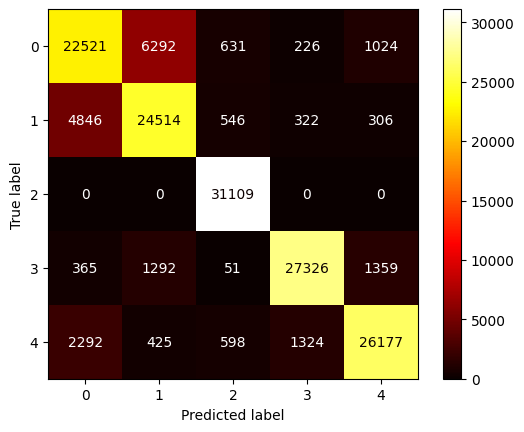


Prediction of Testing with LR classifier :

              precision    recall  f1-score   support

           0       0.75      0.74      0.74     30690
           1       0.76      0.80      0.78     30870
           2       0.94      1.00      0.97     30424
           3       0.94      0.90      0.92     30594
           4       0.91      0.85      0.88     30968

    accuracy                           0.86    153546
   macro avg       0.86      0.86      0.86    153546
weighted avg       0.86      0.86      0.86    153546



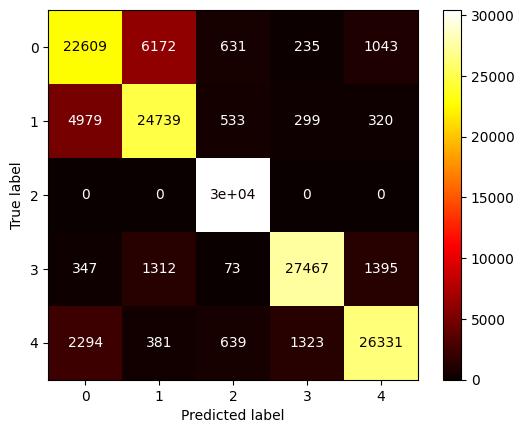

In [9]:
# --------------------------- Training Phase ---------------------------

hrtflrmd = Lr(**Hrtflrmdl.best_params_)
hrtflrmd.fit(hrtflrXtn, hrtflrYtn)

# --------------------------- Validation Phase ---------------------------

hrtflYprd = hrtflrmd.predict(hrtflrXvl)
print("\nPrediction of Validation with LR classifier :\n")
print(rpt(hrtflrYvl, hrtflYprd))


Hrtflrcnx = mtrx(hrtflrYvl, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()

# --------------------------- Testing Phase ---------------------------

hrtflYprd = hrtflrmd.predict(hrtflrXtst)
print("\nPrediction of Testing with LR classifier :\n")
print(rpt(hrtflrYtst, hrtflYprd))

Hrtflrcnx = mtrx(hrtflrYtst, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()


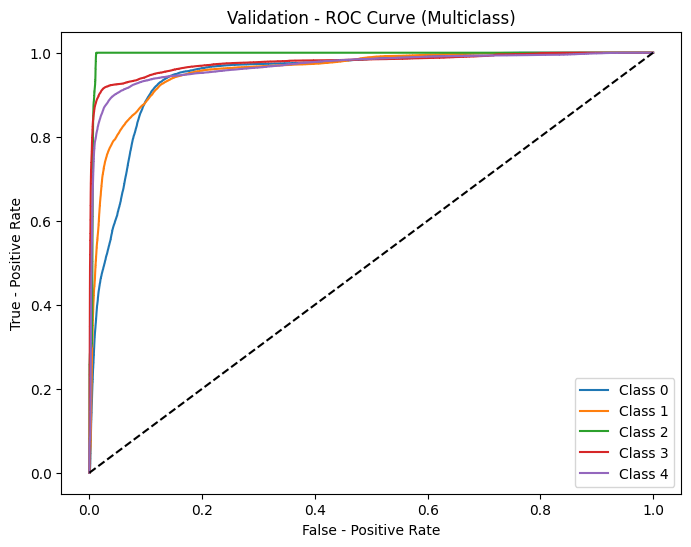


AUC for (LR) Validation:  0.968864722965324


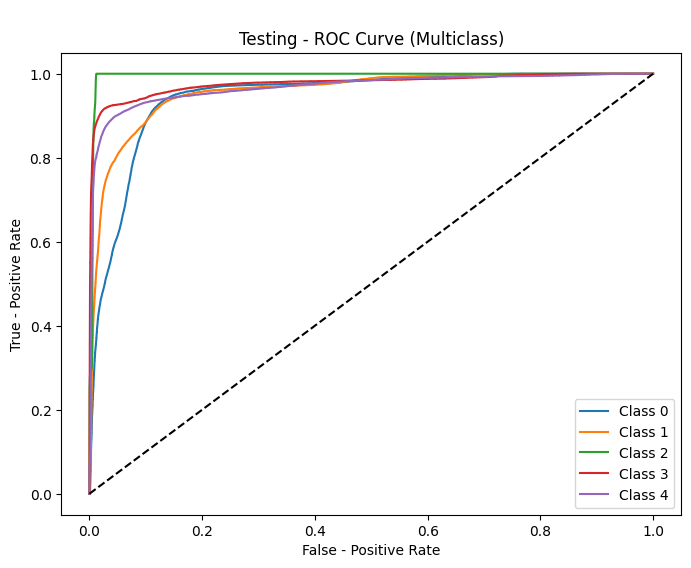


AUC for (LR) Testing:  0.9688116845816713


In [11]:
from sklearn.metrics import roc_curve as roc_curv, roc_auc_score as auc_scor
from sklearn.preprocessing import label_binarize as lbl_bin

# --------------------------- Validation Phase ---------------------------

#--- Binarize the labels
hrtflrYvl_bin = lbl_bin(hrtflrYvl, classes=[0,1,2,3,4])
hrtflrYprd_pp = hrtflrmd.predict_proba(hrtflrXvl)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYvl_bin.shape[1]):
 hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYvl_bin[:, i], hrtflrYprd_pp[:, i])
 plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--') #--- Diagonal reference line
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('Validation - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC = auc_scor(hrtflrYvl_bin, hrtflrYprd_pp, average="macro")
print("\nAUC for (LR) Validation: ", hrtflrAUC)

# --------------------------- Testing Phase ---------------------------

hrtflrYtst_bin = lbl_bin(hrtflrYtst, classes=[0,1,2,3,4])
hrtflrYprd_proba_tst = hrtflrmd.predict_proba(hrtflrXtst)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYtst_bin.shape[1]):
  hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYtst_bin[:, i], hrtflrYprd_proba_tst[:, i])
  plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('\nTesting - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC_tst = auc_scor(hrtflrYtst_bin, hrtflrYprd_proba_tst, average="macro")
print("\nAUC for (LR) Testing: ", hrtflrAUC_tst)

Performance of Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier as Rf

hrtflrprms = {
 'n_estimators': [100, 200, 300],
 'max_depth': [10, 20, 30, None],
 'min_samples_split': [2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']
}


Hrtflrmdl = Rf(random_state=12)
Hrtflrmdl = GdSH(Hrtflrmdl,hrtflrprms, cv=2)
Hrtflrmdl.fit(hrtflrXtn[:1600], hrtflrYtn[:1600])
print("Optimal configuration for Random Forest:")
print(Hrtflrmdl.best_params_)


Optimal configuration for Random Forest:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}



Prediction of Validation with RF classifier :

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     30694
           1       0.75      0.80      0.78     30534
           2       0.94      1.00      0.97     31109
           3       0.94      0.90      0.92     30393
           4       0.91      0.85      0.88     30816

    accuracy                           0.86    153546
   macro avg       0.86      0.86      0.86    153546
weighted avg       0.86      0.86      0.86    153546



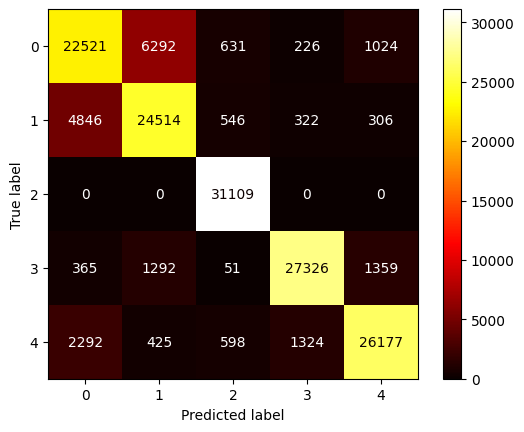


Prediction of Testing with RF classifier :

              precision    recall  f1-score   support

           0       0.75      0.74      0.74     30690
           1       0.76      0.80      0.78     30870
           2       0.94      1.00      0.97     30424
           3       0.94      0.90      0.92     30594
           4       0.91      0.85      0.88     30968

    accuracy                           0.86    153546
   macro avg       0.86      0.86      0.86    153546
weighted avg       0.86      0.86      0.86    153546



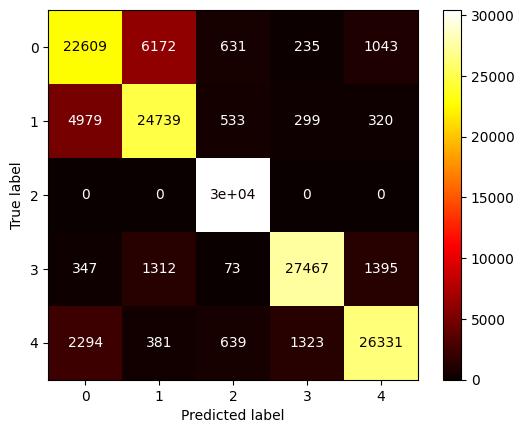

In [16]:
# --------------------------- Training Phase ---------------------------
Hrtflrmdl = Hrtflrmdl.best_estimator_
hrtflrmd.fit(hrtflrXtn, hrtflrYtn)

# --------------------------- Validation Phase ---------------------------

hrtflYprd = hrtflrmd.predict(hrtflrXvl)
print("\nPrediction of Validation with RF classifier :\n")
print(rpt(hrtflrYvl, hrtflYprd))


Hrtflrcnx = mtrx(hrtflrYvl, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()

# --------------------------- Testing Phase ---------------------------

hrtflYprd = hrtflrmd.predict(hrtflrXtst)
print("\nPrediction of Testing with RF classifier :\n")
print(rpt(hrtflrYtst, hrtflYprd))

Hrtflrcnx = mtrx(hrtflrYtst, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()

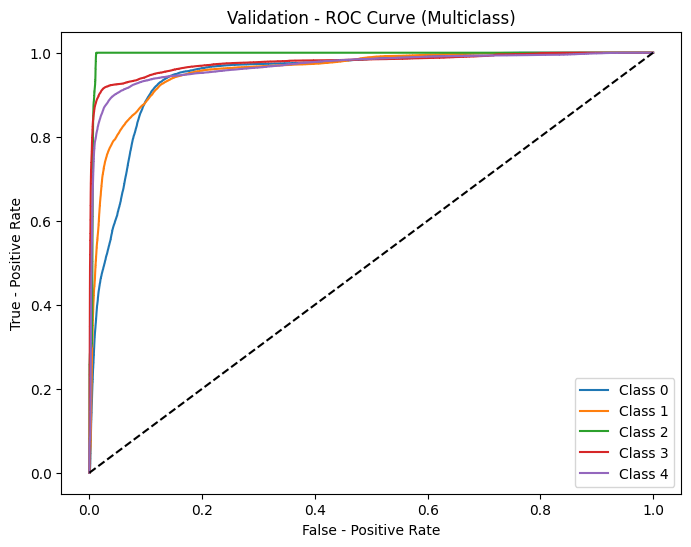


AUC for (RF) Validation:  0.968864722965324


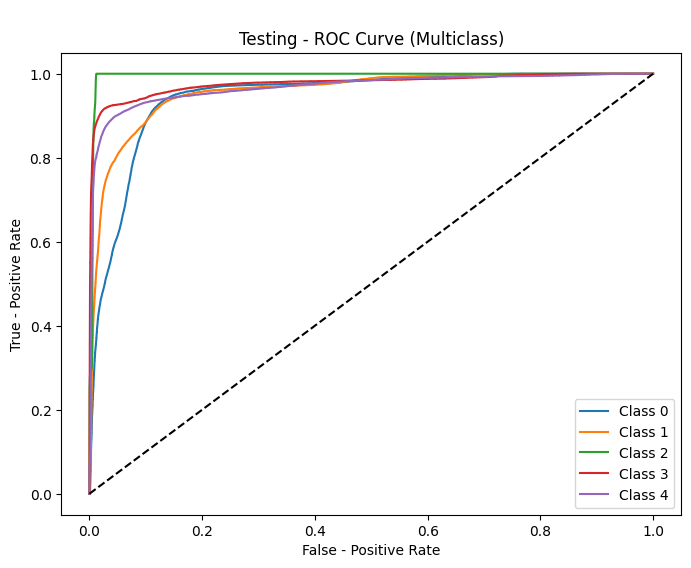


AUC for (RF) Testing:  0.9688116845816713


In [17]:
# --------------------------- Validation Phase ---------------------------

hrtflrYvl_bin = lbl_bin(hrtflrYvl, classes=[0,1,2,3,4])
hrtflrYprd_pp = hrtflrmd.predict_proba(hrtflrXvl)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYvl_bin.shape[1]):
 hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYvl_bin[:, i], hrtflrYprd_pp[:, i])
 plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('Validation - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC = auc_scor(hrtflrYvl_bin, hrtflrYprd_pp, average="macro")
print("\nAUC for (RF) Validation: ", hrtflrAUC)

# --------------------------- Testing Phase ---------------------------

hrtflrYtst_bin = lbl_bin(hrtflrYtst, classes=[0,1,2,3,4])
hrtflrYprd_proba_tst = hrtflrmd.predict_proba(hrtflrXtst)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYtst_bin.shape[1]):
 hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYtst_bin[:, i], hrtflrYprd_proba_tst[:, i])
 plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('\nTesting - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC_tst = auc_scor(hrtflrYtst_bin, hrtflrYprd_proba_tst, average="macro")
print("\nAUC for (RF) Testing: ", hrtflrAUC_tst)

Performance of Long Short Term Memory (LSTM)

In [18]:
from tensorflow.keras.layers import LSTM as lshort, Dense as den
from tensorflow.keras.models import Sequential as sequen
import numpy as np

hrtflr_NNMdl = sequen()
hrtflr_NNMdl.add(lshort(100, activation='tanh', input_shape=(hrtflrXtn.shape[1], 1)))

hrtflr_NNMdl.add(den(64, activation='tanh'))
hrtflr_NNMdl.add(den(32, activation='tanh'))
hrtflr_NNMdl.add(den(32, activation='tanh'))
hrtflr_NNMdl.add(den(len(set(Hrtflr_Yo)), activation='softmax'))

# --------------------------- Training Phase ---------------------------

hrtflr_NNMdl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hrtflr_hsy = hrtflr_NNMdl.fit(hrtflrXtn, hrtflrYtn, batch_size=1000, epochs=5)


Epoch 1/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 147s 312ms/step - accuracy: 0.6944 - loss: 0.7521
Epoch 2/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 128s 279ms/step - accuracy: 0.9455 - loss: 0.1694
Epoch 3/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 145s 284ms/step - accuracy: 0.9698 - loss: 0.0973
Epoch 4/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 138s 275ms/step - accuracy: 0.9773 - loss: 0.0732
Epoch 5/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 141s 274ms/step - accuracy: 0.9823 - loss: 0.0584


4799/4799 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step

Prediction of Validation with LSTM :

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30694
           1       0.98      0.97      0.97     30534
           2       1.00      1.00      1.00     31109
           3       0.99      0.98      0.98     30393
           4       0.99      0.98      0.98     30816

    accuracy                           0.99    153546
   macro avg       0.99      0.99      0.99    153546
weighted avg       0.99      0.99      0.99    153546



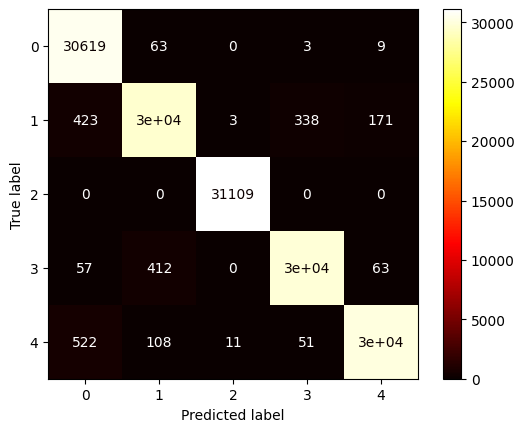

4799/4799 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step

Prediction of Testing with LSTM :

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30690
           1       0.98      0.97      0.97     30870
           2       1.00      1.00      1.00     30424
           3       0.99      0.98      0.98     30594
           4       0.99      0.98      0.99     30968

    accuracy                           0.99    153546
   macro avg       0.99      0.99      0.99    153546
weighted avg       0.99      0.99      0.99    153546



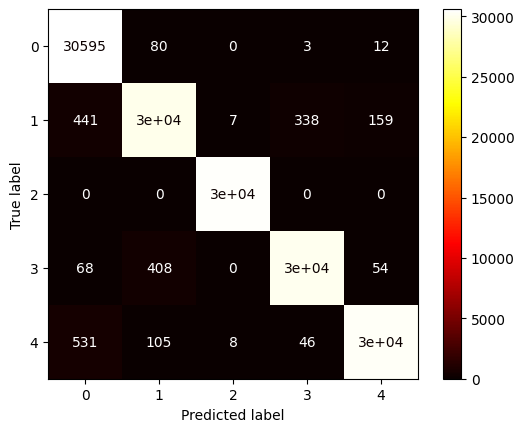

In [19]:
# --------------------------- Validation Phase ---------------------------

hrtflYprd = hrtflr_NNMdl.predict(hrtflrXvl)
hrtflYprd = np.argmax(hrtflYprd, axis=1)
print("\nPrediction of Validation with LSTM :\n")
print(rpt(hrtflrYvl, hrtflYprd))


Hrtflrcnx = mtrx(hrtflrYvl, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()

# --------------------------- Testing Phase ---------------------------

hrtflYprd = hrtflr_NNMdl.predict(hrtflrXtst)
hrtflYprd = np.argmax(hrtflYprd, axis=1)
print("\nPrediction of Testing with LSTM :\n")
print(rpt(hrtflrYtst, hrtflYprd))

Hrtflrcnx = mtrx(hrtflrYtst, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()


4799/4799 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step


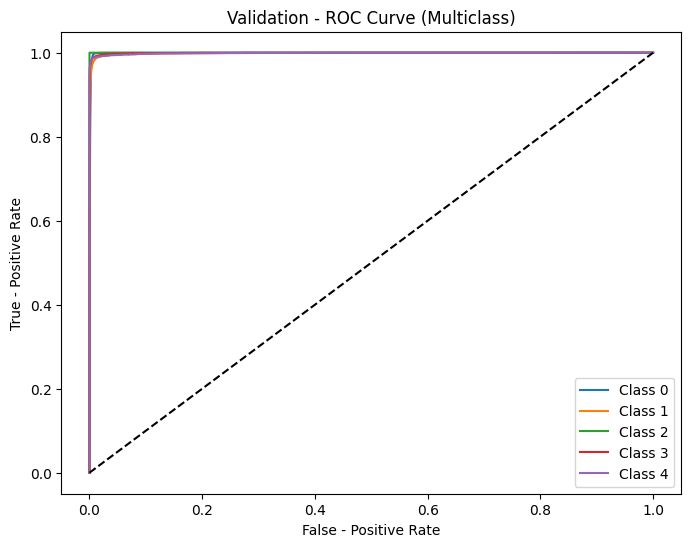


AUC for (LSTM) Validation:  0.9992637229716339
4799/4799 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step


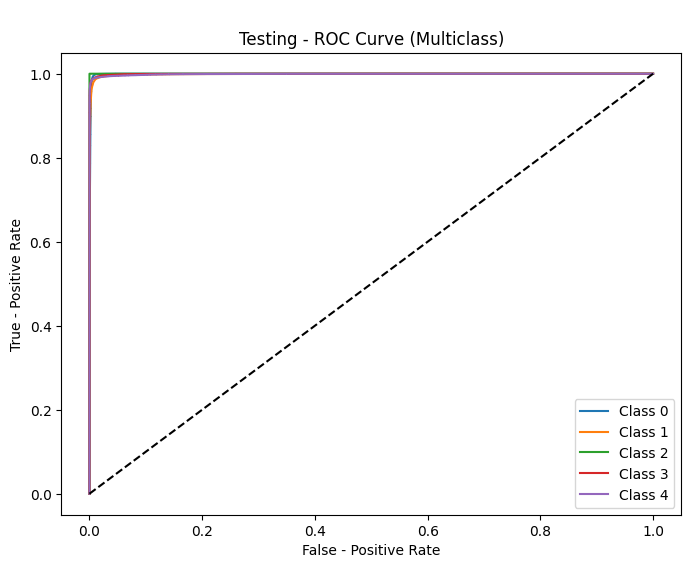


AUC for (LSTM) Testing:  0.9993139480998223


In [20]:
# --------------------------- Validation Phase ---------------------------

hrtflrYvl_bin = lbl_bin(hrtflrYvl, classes=[0,1,2,3,4])
hrtflYprd = hrtflr_NNMdl.predict(hrtflrXvl)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYvl_bin.shape[1]):
 hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYvl_bin[:, i], hrtflYprd[:, i])
 plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('Validation - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC = auc_scor(hrtflrYvl_bin, hrtflYprd, average="macro")
print("\nAUC for (LSTM) Validation: ", hrtflrAUC)

# --------------------------- Testing Phase ---------------------------

hrtflrYtst_bin = lbl_bin(hrtflrYtst, classes=[0,1,2,3,4])
hrtflYprd = hrtflr_NNMdl.predict(hrtflrXtst)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYtst_bin.shape[1]):
 hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYtst_bin[:, i], hrtflYprd[:, i])
 plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('\nTesting - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC_tst = auc_scor(hrtflrYtst_bin, hrtflYprd, average="macro")
print("\nAUC for (LSTM) Testing: ", hrtflrAUC_tst)


Performance of Artificial Neural Network (ANN)

In [21]:
hrtflr_ANMdl = sequen()
hrtflr_ANMdl.add(den(64, activation='tanh', input_shape=(hrtflrXtn.shape[1],)))
hrtflr_ANMdl.add(den(64, activation='tanh'))
hrtflr_ANMdl.add(den(32, activation='tanh'))
hrtflr_ANMdl.add(den(len(set(Hrtflr_Yo)), activation='softmax'))

# --------------------------- Training Phase ---------------------------

hrtflr_ANMdl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hrtflr_hsy = hrtflr_ANMdl.fit(hrtflrXtn, hrtflrYtn, batch_size=1000, epochs=5)


Epoch 1/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7998 - loss: 0.5976
Epoch 2/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9377 - loss: 0.2001
Epoch 3/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9530 - loss: 0.1474
Epoch 4/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9598 - loss: 0.1215
Epoch 5/5
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9657 - loss: 0.1047


4799/4799 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

Prediction of Validation with ANN :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     30694
           1       0.96      0.90      0.93     30534
           2       1.00      1.00      1.00     31109
           3       0.96      0.97      0.97     30393
           4       0.98      0.97      0.97     30816

    accuracy                           0.96    153546
   macro avg       0.96      0.96      0.96    153546
weighted avg       0.96      0.96      0.96    153546



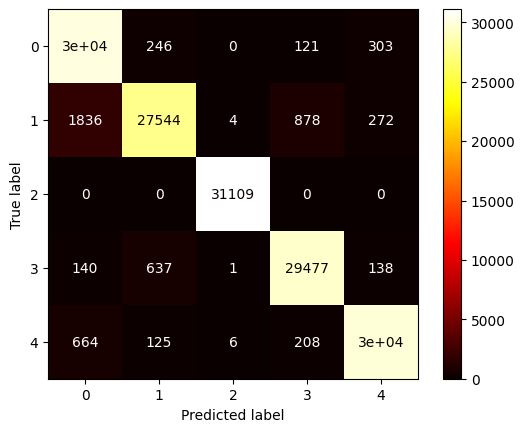

4799/4799 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step

Prediction of Testing with ANN :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     30690
           1       0.97      0.90      0.93     30870
           2       1.00      1.00      1.00     30424
           3       0.96      0.97      0.96     30594
           4       0.98      0.97      0.97     30968

    accuracy                           0.96    153546
   macro avg       0.96      0.96      0.96    153546
weighted avg       0.96      0.96      0.96    153546



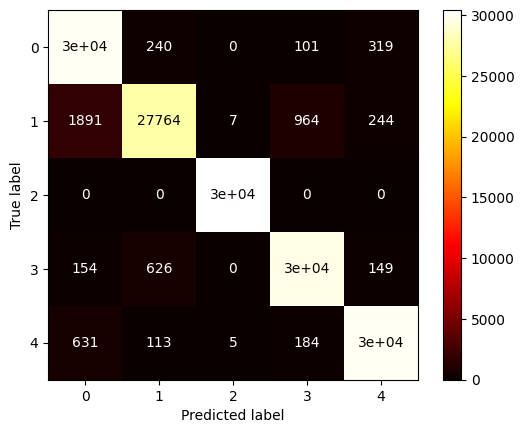

In [22]:
# --------------------------- Validation Phase ---------------------------

hrtflYprd = hrtflr_ANMdl.predict(hrtflrXvl)
hrtflYprd = np.argmax(hrtflYprd, axis=1)
print("\nPrediction of Validation with ANN :\n")
print(rpt(hrtflrYvl, hrtflYprd))


Hrtflrcnx = mtrx(hrtflrYvl, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()

# --------------------------- Testing Phase ---------------------------

hrtflYprd = hrtflr_ANMdl.predict(hrtflrXtst)
hrtflYprd = np.argmax(hrtflYprd, axis=1)
print("\nPrediction of Testing with ANN :\n")
print(rpt(hrtflrYtst, hrtflYprd))

Hrtflrcnx = mtrx(hrtflrYtst, hrtflYprd)
dp(confusion_matrix = Hrtflrcnx, display_labels = [0,1,2,3,4]).plot(cmap='hot')
plt.show()



4799/4799 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


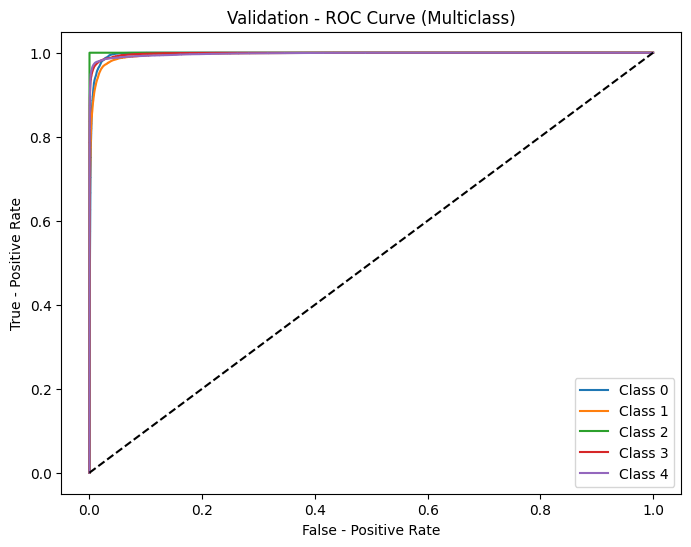


AUC for (ANN) Validation:  0.997796693340036
4799/4799 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


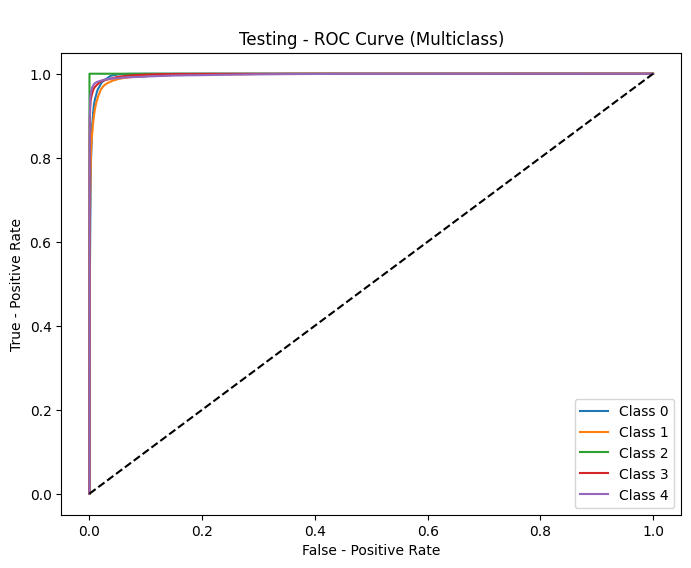


AUC for (ANN) Testing:  0.9978853249790204


In [23]:
# --------------------------- Validation Phase ---------------------------

hrtflrYvl_bin = lbl_bin(hrtflrYvl, classes=[0,1,2,3,4])
hrtflYprd = hrtflr_ANMdl.predict(hrtflrXvl)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYvl_bin.shape[1]):
 hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYvl_bin[:, i], hrtflYprd[:, i])
 plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('Validation - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC = auc_scor(hrtflrYvl_bin, hrtflYprd, average="macro")
print("\nAUC for (ANN) Validation: ", hrtflrAUC)

# --------------------------- Testing Phase ---------------------------

hrtflrYtst_bin = lbl_bin(hrtflrYtst, classes=[0,1,2,3,4])
hrtflYprd = hrtflr_ANMdl.predict(hrtflrXtst)

plt.figure(figsize=(8, 6))
for i in range(hrtflrYtst_bin.shape[1]):
 hrt_fpr, hrt_tpr, _ = roc_curv(hrtflrYtst_bin[:, i], hrtflYprd[:, i])
 plt.plot(hrt_fpr, hrt_tpr, label=f'Class {i}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False - Positive Rate')
plt.ylabel('True - Positive Rate')
plt.title('\nTesting - ROC Curve (Multiclass)')
plt.legend()
plt.show()

hrtflrAUC_tst = auc_scor(hrtflrYtst_bin, hrtflYprd, average="macro")
print("\nAUC for (ANN) Testing: ", hrtflrAUC_tst)